In [3]:
#from google.colab import drive
#drive.mount('C:/AI')

In [1]:
import seaborn as sns # Будем визулизировать данные этой библиотекой
import pandas as pd # Библиотека для работы с датафреймом
import numpy as np # Библиотека для работы с массивами
import matplotlib.pyplot as plt # Будем визулизировать данные этой библиотекой
sns.set_style('darkgrid')

In [2]:
from tensorflow.keras import utils # Функции-утилиты для работы с категориальными данными
from tensorflow.keras.models import Sequential, Model # Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate # Основные слои
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D # Основные слои
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop, Nadam # Оптимизаторы
from tensorflow.keras.initializers import lecun_normal # Инициализатор
import re # Регулярные выражения
from sklearn.metrics import mean_squared_error, mean_absolute_error # Метрики для расчета ошибок
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler # Масштабирование данных
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_regression

In [3]:
from keras.models import load_model

In [4]:
from tabulate import tabulate
pd.set_option("display.max_columns", 100)

## перевод в numpy_array

Разбиваем данные на X и Y

In [5]:
db = pd.read_csv('C:/AI/Scoring/Red/End/df_2_train_norm.csv')

In [6]:
db_val = pd.read_csv('C:/AI/Scoring/Red/End/df_2_val_norm.csv')

In [7]:
db_test = pd.read_csv('C:/AI/Scoring/Red/End/df_2_test_norm.csv')

In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483963 entries, 0 to 2483962
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   owner_id                             int64  
 1   contract_id                          int64  
 2   issue_dt                             int64  
 3   close_dt                             int64  
 4   region_name                          int64  
 5   city_name                            int64  
 6   population                           int64  
 7   date_of_birth                        int64  
 8   gender                               int64  
 9   education                            int64  
 10  position                             int64  
 11  dt_nbki                              int64  
 12  id_nbki                              int64  
 13  issued                               int64  
 14  amount                               float64
 15  type_credit                     

In [9]:
db_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672489 entries, 0 to 672488
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   owner_id                             672489 non-null  int64  
 1   contract_id                          672489 non-null  int64  
 2   issue_dt                             672489 non-null  int64  
 3   close_dt                             672489 non-null  int64  
 4   region_name                          672489 non-null  int64  
 5   city_name                            672489 non-null  int64  
 6   population                           672489 non-null  int64  
 7   date_of_birth                        672489 non-null  int64  
 8   gender                               672489 non-null  int64  
 9   education                            672489 non-null  int64  
 10  position                             672489 non-null  int64  
 11  dt_nbki      

In [10]:
db_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768251 entries, 0 to 768250
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   owner_id                             768251 non-null  int64  
 1   contract_id                          768251 non-null  int64  
 2   issue_dt                             768251 non-null  int64  
 3   close_dt                             768251 non-null  int64  
 4   region_name                          768251 non-null  int64  
 5   city_name                            768251 non-null  int64  
 6   population                           768251 non-null  int64  
 7   date_of_birth                        768251 non-null  int64  
 8   gender                               768251 non-null  int64  
 9   education                            768251 non-null  int64  
 10  position                             768251 non-null  int64  
 11  dt_nbki      

In [11]:
db.head(10)


,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
0,184,34524,1665964800,1668816000,3,469,182291,373161600,0,1,20,1665964800,4605,1148688000,0.00,12,2,2197584000,0.000,141531.65,0.0,0.0,1421280000,1660608000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1421280000,140070.97,0,0
1,184,34524,1665964800,1668816000,3,469,182291,373161600,0,1,20,1665964800,4605,1370476800,168000.00,11,2,1529280000,0.000,268860.28,0.0,0.0,1529280000,1529452800,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3240.15,1529280000,168000.00,0,0
2,184,34524,1665964800,1668816000,3,469,182291,373161600,0,1,20,1665964800,4605,1418860800,29356.04,21,2,1450310400,40.998,39779.33,0.0,0.0,1450310400,1451433600,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1450310400,29356.04,0,0
3,184,34524,1665964800,1668816000,3,469,182291,373161600,0,1,20,1665964800,4605,1447372800,15620.00,21,2,1479081600,0.000,0.00,0.0,0.0,1476316800,1476316800,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1157.42,1476316800,0.00,0,0
4,184,34524,1665964800,1668816000,3,469,182291,373161600,0,1,20,1665964800,4605,1449446400,32000.00,12,2,1633046400,29.768,186130.59,0.0,0.0,1629072000,1633046400,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1633046400,128642.19,0,0
5,184,34524,1665964800,1668816000,3,469,182291,373161600,0,1,20,1665964800,4605,1476403200,160000.00,12,2,1888099200,29.491,797599.98,0.0,0.0,1664496000,1665014400,161381.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1665014400,484629.23,0,0
6,184,34524,1665964800,1668816000,3,469,182291,373161600,0,1,20,1665964800,4605,1506988800,11976.00,14,2,1530576000,54.710,14900.73,0.0,0.0,1530576000,1530576000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,1512.46,1530576000,11976.00,0,0
7,184,34524,1665964800,1668816000,3,469,182291,373161600,0,1,20,1665964800,4605,1514592000,14460.72,12,2,1606780800,22.204,12186.18,0.0,0.0,1546992000,1606867200,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1606780800,10954.45,0,0
8,184,34524,1665964800,1668816000,3,469,182291,373161600,0,1,20,1665964800,4605,1522886400,35148.00,21,2,1555027200,19.904,39051.67,0.0,0.0,1555286400,1555286400,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3200.62,1555286400,35148.00,0,0
9,184,34524,1665964800,1668816000,3,469,182291,373161600,0,1,20,1665964800,4605,1531440000,24305.90,12,2,1606780800,22.385,27389.61,0.0,0.0,1563148800,1606867200,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2163.18,1606780800,24305.90,0,0


In [12]:
db = db.sample(frac=1)
db_val = db_val.sample(frac=1)
db_test = db_test.sample(frac=1)

In [13]:
db.head(10)

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
878371,341,15771,1632268800,1634428800,60,317,23114,0,0,5,7,1643932800,6442,1589414400,8720.0,14,2,1593993600,365.000,11528.0,0.0,0.0,1592265600,1592784000,0.0,0.0,0.0,0.0,0.0,0.0,11528.0,0.0,8,0.0,1592265600,0.0,0,0
1903556,27014,28114,1626652800,1676851200,10,227,311166,0,0,5,7,1626652800,7362,1542326400,15000.0,14,2,1544918400,0.000,17520.0,0.0,0.0,1544745600,1547078400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.0,1544745600,0.0,0,1
1874795,20219,33888,1621987200,1660694400,68,75,12600,201398400,1,0,10,1621987200,12332,1601337600,5150.0,14,2,1602806400,229.735,5755.0,0.0,0.0,1602892800,1616198400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.0,1602892800,0.0,0,1
1436063,7890,19862,1683158400,1687219200,3,469,182291,716860800,1,1,19,1683158400,36558,1682035200,29999.0,21,2,1710201600,43.964,0.0,0.0,0.0,0,1682035200,29999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1682035200,0.0,0,1
363841,117,26522,1622073600,1624752000,23,398,21719,0,0,6,7,1646092800,23301,1480291200,3751.0,21,2,1482710400,4561.000,4561.0,0.0,0.0,1482624000,1615161600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.0,1482624000,0.0,0,0
1412780,6636,1584,1631232000,1638662400,3,469,182291,926899200,0,0,9,1631232000,20100,1629676800,17000.0,14,2,1632268800,365.000,0.0,0.0,0.0,0,1629763200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.0,1629763200,0.0,0,1
113586,5547,1474,1664841600,1665705600,60,13,24351,0,0,5,7,1664841600,33485,1535068800,0.0,20,2,4102444800,0.000,0.0,0.0,0.0,0,1646006400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1535068800,0.0,0,0
406821,133,17926,1603411200,1605916800,61,409,126479,0,0,5,7,1655856000,28349,1650672000,7714.0,14,2,1653177600,237.251,9219.0,0.0,0.0,1653177600,1653264000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.0,1653177600,0.0,0,0
557965,198,44124,1625702400,1635120000,19,354,7512,202694400,0,6,7,1621296000,7166,1534377600,5023.0,14,2,1537142400,237.250,6104.0,0.0,0.0,1537228800,1615420800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.0,1537228800,0.0,0,0
1731318,21082,42803,1640044800,1644969600,30,359,509420,630028800,1,5,3,1640044800,26193,1626393600,10000.0,14,2,1631923200,365.000,15877.0,0.0,0.0,1631923200,1635724800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.0,1631923200,0.0,0,1


In [14]:
X = db.drop('Client_class', axis=1)
y = np.array(db['Client_class'])

In [15]:
X_val = db_val.drop('Client_class', axis=1)
y_val = np.array(db_val['Client_class'])

In [16]:
X_test = db_test.drop('Client_class', axis=1)
y_test = np.array(db_test['Client_class'])

In [17]:
# y = np.subtract(y, 1) #если классы идут с 1

In [18]:
# y_val = np.subtract(y_val, 1) #если классы идут с 1

In [19]:
# y_test = np.subtract(y_test, 1) #если классы идут с 1

In [20]:
X, y

(         owner_id  contract_id    issue_dt    close_dt  region_name  \
 878371        341        15771  1632268800  1634428800           60   
 1903556     27014        28114  1626652800  1676851200           10   
 1874795     20219        33888  1621987200  1660694400           68   
 1436063      7890        19862  1683158400  1687219200            3   
 363841        117        26522  1622073600  1624752000           23   
 ...           ...          ...         ...         ...          ...   
 1229682       404        36214  1628467200  1629590400           43   
 1207244       391        11978  1646956800  1652227200           34   
 1009962       358        19230  1655164800  1657756800           14   
 2374429     28524         5379  1680393600           0           44   
 2385831     29215        27565  1641427200           0            9   
 
          city_name  population  date_of_birth  gender  education  position  \
 878371         317       23114              0       0 

In [21]:
scaler = StandardScaler(with_mean=False) # Нормализуем данные
scaler.fit(X)
x = scaler.transform(X)
print(x) # Посмотрим на нормализованные данные
print(np.unique(y))

[[3.05202248e-02 1.21598652e+00 6.39940538e+01 ... 1.94652755e+01
  0.00000000e+00 0.00000000e+00]
 [2.41781041e+00 2.16766503e+00 6.37738752e+01 ... 1.88843487e+01
  0.00000000e+00 0.00000000e+00]
 [1.80964347e+00 2.61285596e+00 6.35909576e+01 ... 1.95951919e+01
  0.00000000e+00 0.00000000e+00]
 ...
 [3.20417609e-02 1.48268473e+00 6.48917048e+01 ... 1.80499264e+01
  0.00000000e+00 0.00000000e+00]
 [2.55295862e+00 4.14735369e-01 6.58808147e+01 ... 2.04074333e+01
  2.30609186e-01 0.00000000e+00]
 [2.61480459e+00 2.12533565e+00 6.43531142e+01 ... 1.91505188e+01
  0.00000000e+00 0.00000000e+00]]
[0 1]


In [22]:

scaler.fit(X_val)
x_val = scaler.transform(X_val)
print(x_val) # Посмотрим на нормализованные данные
print(np.unique(y_val))

[[1.48017569e+00 3.07949820e+00 6.32736721e+01 ... 1.95365712e+01
  0.00000000e+00 0.00000000e+00]
 [4.21277318e-01 3.36726778e+00 6.36255497e+01 ... 2.00747158e+01
  0.00000000e+00 0.00000000e+00]
 [1.93837879e+00 2.93882460e+00 6.39503597e+01 ... 2.01547969e+01
  0.00000000e+00 0.00000000e+00]
 ...
 [2.93789044e-02 4.13818693e-01 6.43056207e+01 ... 1.59062306e+01
  0.00000000e+00 0.00000000e+00]
 [7.13269487e-01 1.27055029e-01 6.35240465e+01 ... 1.86129698e+01
  0.00000000e+00 0.00000000e+00]
 [2.68632796e-02 6.80541400e-01 6.50059923e+01 ... 1.93998996e+01
  0.00000000e+00 0.00000000e+00]]
[0 1]


In [23]:

scaler.fit(X_test)
x_test = scaler.transform(X_test)
print(x_test) # Посмотрим на нормализованные данные
print(np.unique(y_test))

[[1.52917353e+00 1.96840691e+00 6.40623489e+01 ... 1.89951932e+01
  0.00000000e+00 0.00000000e+00]
 [1.62725594e-02 2.95510921e+00 6.63242121e+01 ... 1.73929918e+01
  0.00000000e+00 0.00000000e+00]
 [2.15262714e+00 2.83032017e+00 6.51661110e+01 ... 1.95384685e+01
  0.00000000e+00 0.00000000e+00]
 ...
 [3.20086607e-02 2.65786063e+00 6.42355547e+01 ... 1.91987936e+01
  0.00000000e+00 0.00000000e+00]
 [2.15611411e+00 9.28575063e-01 6.32982060e+01 ... 1.89440374e+01
  0.00000000e+00 0.00000000e+00]
 [1.44843660e-02 1.92627234e+00 6.58385568e+01 ... 1.90698808e+01
  0.00000000e+00 0.00000000e+00]]
[0 1]


In [24]:
from keras.utils import to_categorical

In [25]:
print(np.unique(y))

[0 1]


In [26]:
# Преобразование ответов в формат one_hot_encoding
y = to_categorical(y, num_classes = 2)

In [27]:
y_val = to_categorical(y_val, num_classes = 2)

In [28]:
y_test = to_categorical(y_test, num_classes = 2)

In [29]:
print('Размер y_test:', y_test.shape)

Размер y_test: (768251, 2)


#Модель 2

In [30]:
from keras.initializers import glorot_uniform

In [31]:
number_of_cols = x.shape[1]
initializer=glorot_uniform(seed=64)

model22_cl = Sequential() # Последовательная модель нейронной сети

model22_cl.add(Dense(576, input_dim=number_of_cols, kernel_initializer=initializer, activation='selu'))
model22_cl.add(BatchNormalization())
model22_cl.add(Dropout(0.4))
model22_cl.add(Dense(384, kernel_initializer=initializer, activation='selu'))
model22_cl.add(BatchNormalization())
model22_cl.add(Dropout(0.4))
model22_cl.add(Dense(2, activation='softmax'))

model22_cl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 576)               21888     
                                                                 
 batch_normalization (Batch  (None, 576)               2304      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 576)               0         
                                                                 
 dense_1 (Dense)             (None, 384)               221568    
                                                                 
 batch_normalization_1 (Bat  (None, 384)               1536      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 384)               0

In [32]:
model22_cl.compile(optimizer=RMSprop(learning_rate=0.0005, rho=0.85),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [33]:
x.shape, y.shape

((2483963, 37), (2483963, 2))

Epoch 1/50
77624/77624 [==============================] - 297s 4ms/step - loss: 0.0975 - accuracy: 0.9651 - val_loss: 2.2515 - val_accuracy: 0.6837
Epoch 2/50
77624/77624 [==============================] - 284s 4ms/step - loss: 0.0738 - accuracy: 0.9753 - val_loss: 0.5237 - val_accuracy: 0.9078
Epoch 3/50
77624/77624 [==============================] - 271s 3ms/step - loss: 0.0690 - accuracy: 0.9768 - val_loss: 0.9166 - val_accuracy: 0.8551
Epoch 4/50
77624/77624 [==============================] - 280s 4ms/step - loss: 0.0661 - accuracy: 0.9776 - val_loss: 0.2880 - val_accuracy: 0.9343
Epoch 5/50
77624/77624 [==============================] - 289s 4ms/step - loss: 0.0658 - accuracy: 0.9779 - val_loss: 0.4567 - val_accuracy: 0.9328
Epoch 6/50
77624/77624 [==============================] - 287s 4ms/step - loss: 0.0644 - accuracy: 0.9783 - val_loss: 1.0481 - val_accuracy: 0.9040
Epoch 7/50
77624/77624 [==============================] - 288s 4ms/step - loss: 0.0636 - accuracy: 0.9785 - val_

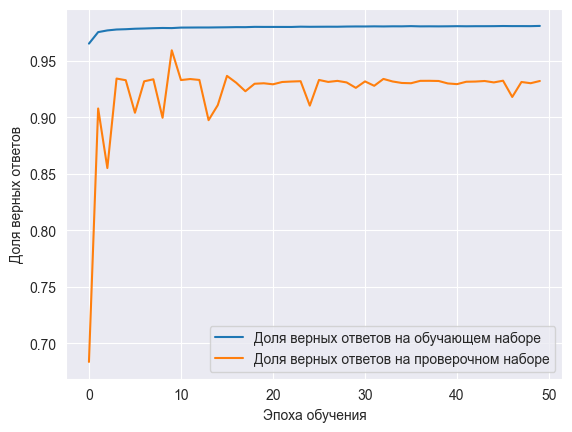

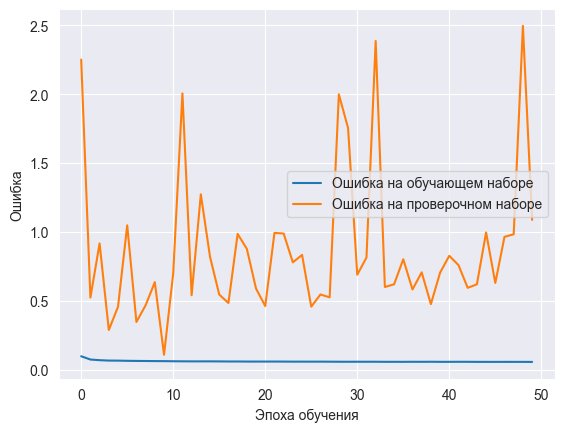

In [34]:
import time
start_time = time.time() # счетчик времени
history = model22_cl.fit(x,                            # Обучающая выборка
                        y,                               # Метки классов обучающей выборки
                        epochs=50,                             # Количество эпох
                        batch_size=32,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения

print('Максимальное значение accuracy:', max(history.history['accuracy'])) # print the highest accuracy achieved by the model
print('Минимальное значение loss:', min(history.history['loss']))
print('Максимальное значение val_accuracy:', max(history.history['val_accuracy']))
print('Минимальное значение val_loss:', min(history.history['val_loss']))

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [35]:
model22_cl.save('C:/AI/Scoring/Red/model2_all_3.keras')

In [36]:
loss, acc = model22_cl.evaluate(x_test, y_test, verbose=1) #classification

24008/24008 [==============================] - 38s 1ms/step - loss: 0.6283 - accuracy: 0.9739


In [37]:
loss

0.6283107995986938

In [38]:
acc

0.9738731384277344

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score

24008/24008 [==============================] - 37s 1ms/step
[[358932   6041]
 [ 14031 389247]]


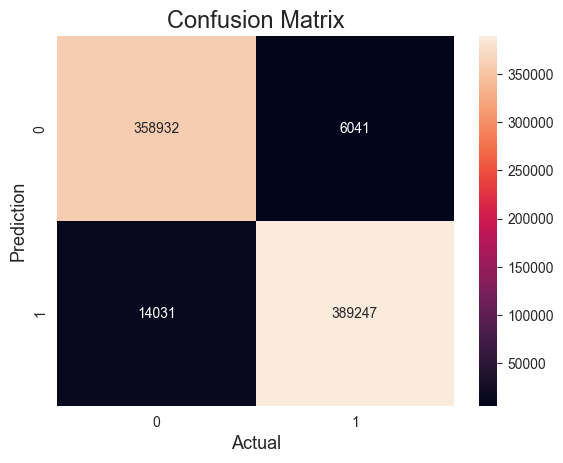

Accuracy   : 0.9738731221957407


In [40]:
# compute the confusion matrix
y_pred=model22_cl.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)